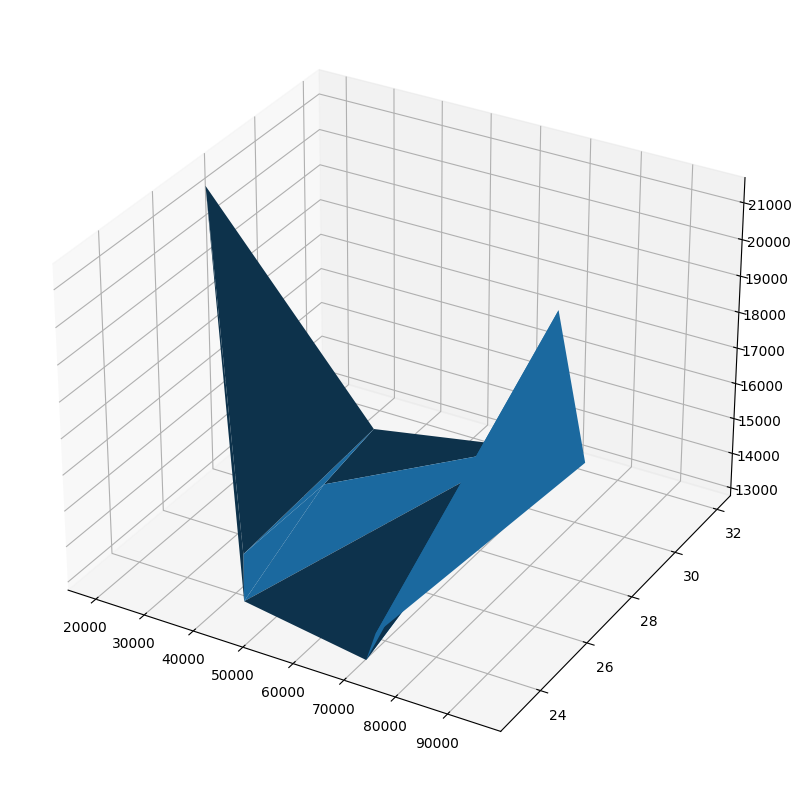

In [3]:
# 1a. Visualize the n-dimensional data using 3D surface plots.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('Toyota.csv')
dataset.head(5)
x = dataset['KM'][:10]
y = dataset['Age'][:10]
z = dataset['Price'][:10]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x, y, z)

In [3]:
# 1b.Write a program to implement the Best First Search (BFS) algorithm.
import heapq

def best_first_search(graph, start, goal):
    # Initialize the priority queue with the start node
    frontier = [(0, start)]
    # Initialize the explored set
    explored = set()

    # Loop until the frontier is empty
    while frontier:
        # Pop the node with the highest priority
        (cost, current_node) = heapq.heappop(frontier)

        # Check if the current node is the goal
        if current_node == goal:
            return cost

        # Add the current node to the explored set
        explored.add(current_node)
        print(f"Explored node: {current_node}")
        
        # Explore the neighbors of the current node
        for neighbor, neighbor_cost in graph[current_node]:
            # Check if the neighbor is not in the explored set and not in the frontier
            if neighbor not in explored and neighbor not in [node[1] for node in frontier]:
                # Add the neighbor to the frontier with its priority being its heuristic cost
                heapq.heappush(frontier, (neighbor_cost+cost, neighbor))
                print(f"Added node {neighbor} to frontier with cost {neighbor_cost}")

    # If the goal cannot be reached, return None
    return None

# Example graph
graph = {
    'A': [('B', 5), ('C', 6)],
    'B': [('D', 4), ('E', 7)],
    'C': [('F', 9), ('G', 8)],
    'D': [('H', 3)],
    'E': [('I', 6)],
    'F': [('J', 5)],
    'G': [('K', 7)],
    'H': [('L', 1)],
    'I': [('M', 2)],
    'J': [('N', 3)],
    'K': [('O', 4)],
    'L': [],
    'M': [],
        'N': [],
    'O': [('P', 1)],
    'P': []
}

# Get start and goal nodes from the user
start = input("Enter the start node: ")
goal = input("Enter the goal node: ")

# Run the Best First Search algorithm
result = best_first_search(graph, start, goal)

# Print the result
if result is not None:
    print(f"The minimum cost from {start} to {goal} is {result}.")
else:
    print(f"There is no path from {start} to {goal}.")

Enter the start node: A
Enter the goal node: H
Explored node: A
Added node B to frontier with cost 5
Added node C to frontier with cost 6
Explored node: B
Added node D to frontier with cost 4
Added node E to frontier with cost 7
Explored node: C
Added node F to frontier with cost 9
Added node G to frontier with cost 8
Explored node: D
Added node H to frontier with cost 3
Explored node: E
Added node I to frontier with cost 6
The minimum cost from A to H is 12.


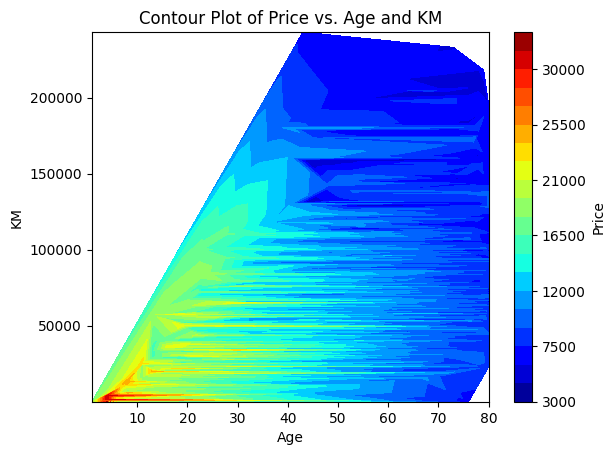

In [1]:
# 2a. Visualize the n-dimensional data using contour plots.
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('Toyota.csv')
dataset.head(5)
x = dataset['Age']
y = dataset['KM']
z = dataset['Price']

# Create a contour plot
plt.tricontourf(x, y, z, levels=20, cmap='jet')
plt.colorbar(label='Price')
plt.xlabel('Age')
plt.ylabel('KM')
plt.title('Contour Plot of Price vs. Age and KM')
plt.show()

In [15]:
# 2b. Write a program to implementimport heapq

def a_star(graph, start, goal, heuristic):
    # Initialize the priority queue with the start node
    frontier = [(0 + heuristic[start], start)]
    # Initialize the cost dictionary with the start node
    cost = {start: 0}
    # Initialize the parent dictionary with the start node
    parent = {start: None}
    # Initialize the explored set
    explored = set()

    # Loop until the frontier is empty
    while frontier:
        # Pop the node with the lowest f-score
        (f_score, current_node) = heapq.heappop(frontier)

        # Check if the current node is the goal
        if current_node == goal:
            # Reconstruct the path from the goal to the start
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = parent[current_node]
            path.reverse()
            return (path, cost[goal])

        # Add the current node to the explored set the A* algorithm
        explored.add(current_node)

        # Explore the neighbors of the current node
        for neighbor, neighbor_cost in graph[current_node]:
            # Calculate the tentative g-score
            tentative_g_score = cost[current_node] + neighbor_cost
            # Check if the neighbor is already in the explored set
            if neighbor in explored:
                # If the tentative g-score is higher than the current g-score, skip this neighbor
                if tentative_g_score >= cost.get(neighbor, float('inf')):
                    continue

            # Check if the neighbor is not in the frontier or the tentative g-score is lower than the current g-score
            if neighbor not in [node[1] for node in frontier] or tentative_g_score < cost.get(neighbor, float('inf')):
                # Update the cost and parent dictionaries
                cost[neighbor] = tentative_g_score
                parent[neighbor] = current_node
                # Add the neighbor to the frontier with its priority being its f-score
                heapq.heappush(frontier, (tentative_g_score + heuristic[neighbor], neighbor))

    # If the goal cannot be reached, return None
    return None

# Example graph
graph = {
    'A': [('B', 5), ('C', 6)],
    'B': [('D', 4), ('E', 7)],
    'C': [('F', 9), ('G', 8)],
        'D': [('H', 3)],
    'E': [('I', 6)],
    'F': [('J', 5)],
    'G': [('K', 7)],
    'H': [('L', 1)],
    'I': [('M', 2)],
    'J': [('N', 3)],
    'K': [('O', 4)],
    'L': [],
    'M': [],
    'N': [],
    'O': [('P', 1)],
    'P': []
}

# Heuristic function
heuristic = {
    'A': 10,
    'B': 8,
    'C': 7,
    'D': 6,
    'E': 8,
    'F': 3,
    'G': 2,
    'H': 5,
    'I': 6,
    'J': 3,
    'K': 2,
    'L': 1,
    'M': 4,
    'N': 2,
    'O': 4,
    'P': 0
}

# Get start and goal nodes from the user
start = input("Enter the start node: ")
goal = input("Enter the goal node: ")

# Run the Best First Search algorithm
result = a_star(graph, start, goal,heuristic)

# Print the result
if result is not None:
    print(f"The minimum cost from {start} to {goal} is {result}.")
else:
    print(f"There is no path from {start} to {goal}.")

Enter the start node: A
Enter the goal node: H
The minimum cost from A to H is (['A', 'B', 'D', 'H'], 12).


<IPython.core.display.Javascript object>


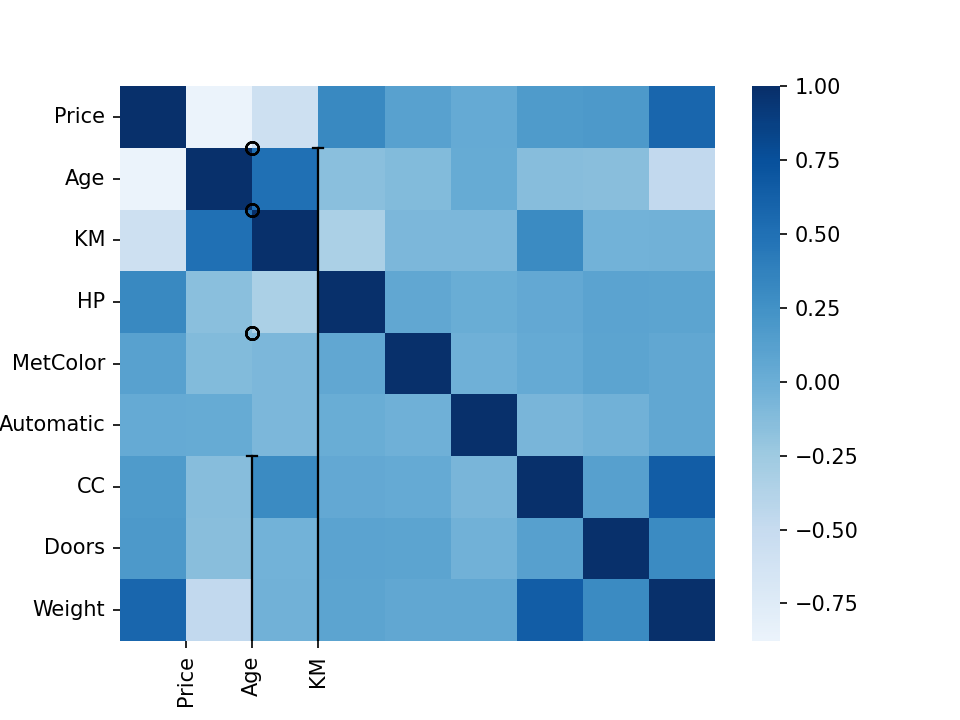

In [16]:
# 3a. Visualize the n-dimensional data using heat-map
#Importing Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Load Csv
data=pd.read_csv("Toyota.csv")
data.head()
# Exclude non-numeric columns
data = data.drop('FuelType', axis=1)

# Plot the correlation matrix
plt.subplots()
sns.heatmap(data.corr(), center=0, cmap='Blues')
plt.show()

In [17]:
# 3b. Write a program to implement Min-Max algorithm.
import math

def minimax (curDepth, nodeIndex,maxTurn, scores,targetDepth):
    # base case : targetDepth reached
    if (curDepth == targetDepth):
        return scores[nodeIndex]

    if (maxTurn):
        return max(minimax(curDepth + 1, nodeIndex * 2,False, scores, targetDepth),
                minimax(curDepth + 1, nodeIndex * 2 + 1,False, scores, targetDepth))

    else:
        return min(minimax(curDepth + 1, nodeIndex * 2,True, scores, targetDepth),
                minimax(curDepth + 1, nodeIndex * 2 + 1,True, scores, targetDepth))

# Driver code
scores = [1, 2, 3, 4, 5, 6, 7, 8]

treeDepth = math.log(len(scores), 2)

print("The optimal value is : ", end = "")
print(minimax(0, 0, True, scores, treeDepth))

The optimal value is : 6


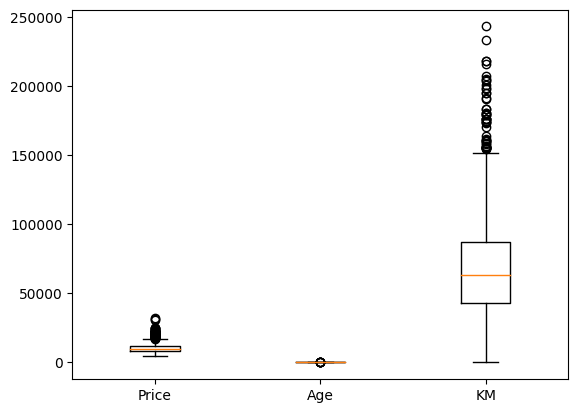

In [2]:
# 4a. Visualize the n-dimensional data using Box-plot.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Toyota.csv')

#Box Plot for Price,Age,KM
plt.boxplot([data["Price"],data["Age"],data["KM"]])
plt.xticks([1,2,3],["Price","Age","KM"])
plt.show()

In [ ]:
# 4b. Write a program to implement Alpha-beta pruning algorithm
class Node:
    def __init__(self, value):
        self.value = value
        self.children = []
        self.alpha = float('-inf')
        self.beta = float('inf')

    def add_child(self, child_node):
        self.children.append(child_node)

    def is_leaf(self):
        return not self.children

def min_max_with_ab_pruning(node, depth, alpha, beta, maximizing_player):
    if depth == 0 or node.is_leaf():
        return node.value

    if maximizing_player:
        max_eval = float('-inf')
        best_child = None

        for child in node.children:
            child_eval = min_max_with_ab_pruning(child, depth-1, alpha, beta, False)
            if child_eval > max_eval:
                max_eval = child_eval
                best_child = child

            alpha = max(alpha, max_eval)
            if alpha >= beta:
                break

        node.alpha = max_eval
        if node.alpha >= node.beta:
            pruned_nodes.append(node)

        return max_eval

    else:
        min_eval = float('inf')
        best_child = None

        for child in node.children:
            child_eval = min_max_with_ab_pruning(child, depth-1, alpha, beta, True)
            if child_eval < min_eval:
                min_eval = child_eval
                best_child = child

            beta = min(beta, min_eval)
            if alpha >= beta:
                break

        node.beta = min_eval
        if node.alpha >= node.beta:
            pruned_nodes.append(node)

        return min_eval


# Create the example tree
root = Node(0)
node_b = Node(3)
node_c = Node(-3)
node_d = Node(2)
node_e = Node(1)
node_f = Node(-2)
node_g = Node(5)
node_h = Node(-5)

root.add_child(node_b)
root.add_child(node_c)
node_b.add_child(node_d)
node_b.add_child(node_e)
node_b.add_child(node_f)
node_d.add_child(node_g)
node_d.add_child(node_h)

# Initialize variables
pruned_nodes = []
maximizing_player = True

# Run the algorithm with alpha-beta pruning and get the optimal value and path
optimal_value = min_max_with_ab_pruning(root, 5, float('-inf'), float('inf'), maximizing_player)

# Print the optimal value and path
print("Optimal value:", optimal_value)
path = [root]
current_node = root
while current_node.children:
    if maximizing_player:
        current_node = max(current_node.children, key=lambda x: x.alpha)
        maximizing_player = False
    else:
        current_node = min(current_node.children, key=lambda x: x.beta)
        maximizing_player = True
    path.append(current_node)

print("Solution path:")
for node in path:
    print(node.value)
# Print the pruned nodes
if pruned_nodes:
    print("Pruned nodes:")
    for node in pruned_nodes:
        print(node.value)
else:
    print("No nodes were pruned.")

Optimal value: -2
Solution path:
0
3
2
5
No nodes were pruned.


In [ ]:
# 5. Write a program to develop the Naive Bayes classifier on Titanic dataset
import pandas as pd
import numpy as np


df = pd.read_csv('titanic.csv')

df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

X = df.drop('Survived', axis=1)
y = df['Survived']

def _gaussian_pdf(x, mean, std):
        exponent = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

class NaiveBayesClassifier:
    def __init__(self):
        self.prior = {}
        self.conditional = {}

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)

        # Compute class priors
        for c in self.classes:
            self.prior[c] = np.mean(y == c)

        # Compute conditional probabilities
        for feature in X.columns:
            self.conditional[feature] = {}
            for c in self.classes:
                feature_values = X[feature][y == c]
                self.conditional[feature][c] = {
                    'mean': np.mean(feature_values),
                    'std': np.std(feature_values)
                }

    def predict(self, X):
        y_pred = []
        for _, sample in X.iterrows():
            probabilities = {}
            for c in self.classes:
                probabilities[c] = self.prior[c]
                for feature in X.columns:
                    mean = self.conditional[feature][c]['mean']
                    std = self.conditional[feature][c]['std']
                    x = sample[feature]
                    probabilities[c] *= _gaussian_pdf(x, mean, std)
            y_pred.append(max(probabilities, key=probabilities.get))
        return y_pred


# Instantiate and train the Naive Bayes classifier
classifier = NaiveBayesClassifier()
classifier.fit(X, y)

# Predict the target variable
y_pred = classifier.predict(X)

# Calculate accuracy
accuracy = np.mean(y_pred == y)
print("Accuracy:", accuracy)

Accuracy: 0.7665544332210998


In [ ]:
# 6. Write a program to develop the KNN classifier with Euclidean distance for the k values as 3 based on split up of training and testing dataset as 70-30 on Glass dataset
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import pandas as pd

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1 - x2) ** 2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

df = pd.read_csv('glass.csv')
X = df.drop('Type', axis=1).values
y = df['Type'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

clf = KNN(k=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(predictions)

accuracy = np.sum(predictions == y_test) / len(y_test)
print("Accuracy:", accuracy)

[2, 1, 1, 7, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 5, 1, 1, 5, 5, 2, 2, 1, 7, 2, 1, 3, 1, 5, 1, 2, 7, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 7, 2, 2, 2, 7, 7, 2, 1, 7, 6, 3, 1, 1, 1, 1, 2, 3, 1, 7, 1, 1, 5, 2, 2]
Accuracy: 0.6307692307692307


In [ ]:
# 7. Write a program to develop the KNN classifier with Manhattan distance for the k values as 5 based on split up of training and testing dataset as 80-20 on Fruit dataset.
import numpy as np
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def manhattan_distance(x1, x2):
    distance = np.sum(np.abs(x1 - x2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        distances = [manhattan_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

df = pd.read_csv('fruit.csv')

# Convert 'fruit_name' column to numerical labels
label_encoder = LabelEncoder()
df['fruit_name'] = label_encoder.fit_transform(df['fruit_name'])
df['fruit_subtype'] = df['fruit_subtype'].factorize()[0]

X = df.drop('fruit_name', axis=1).values
y = df['fruit_name'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(predictions)

accuracy = np.sum(predictions == y_test) / len(y_test)
print("Accuracy:", accuracy)

[3, 1, 0, 3, 2, 1, 3, 0, 0, 1, 0, 1]
Accuracy: 0.6666666666666666


Labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
Centroids: [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]]


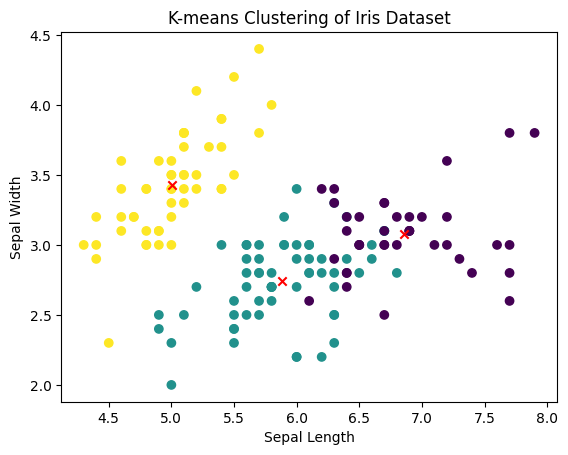

In [ ]:
# 8. Write a program to perform unsupervised K-means clustering techniques on Iris dataset.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

def kmeans(X, K, max_iters=100):
    # Use the first K data points as the initial centroids
    centroids = X[:K]

    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

        # Update the centroids based on the assigned points
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])

        # If the centroids did not change, stop iterating
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Perform K-means clustering
K = 3
labels, centroids = kmeans(X, K)

# Print the resulting labels and centroids
print("Labels:", labels)
print("Centroids:", centroids)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering of Iris Dataset')
plt.show()

Single-linkage proximity matrix:

[[  0.           1.04403065   2.02731349 ... 146.08299011 147.08929261
  148.07177314]
 [  1.04403065   0.           1.02956301 ... 145.08869701 146.09418195
  147.07644271]
 [  2.02731349   1.02956301   0.         ... 144.08521784 145.09055793
  146.07265316]
 ...
 [146.08299011 145.08869701 144.08521784 ...   0.           1.17473401
    2.1       ]
 [147.08929261 146.09418195 145.09055793 ...   1.17473401   0.
    1.26095202]
 [148.07177314 147.07644271 146.07265316 ...   2.1          1.26095202
    0.        ]]

Complete-linkage proximity matrix:

[[  0.           1.04403065   2.02731349 ... 146.08299011 147.08929261
  148.07177314]
 [  1.04403065   0.           1.02956301 ... 145.08869701 146.09418195
  147.07644271]
 [  2.02731349   1.02956301   0.         ... 144.08521784 145.09055793
  146.07265316]
 ...
 [146.08299011 145.08869701 144.08521784 ...   0.           1.17473401
    2.1       ]
 [147.08929261 146.09418195 145.09055793 ...   1.1747340

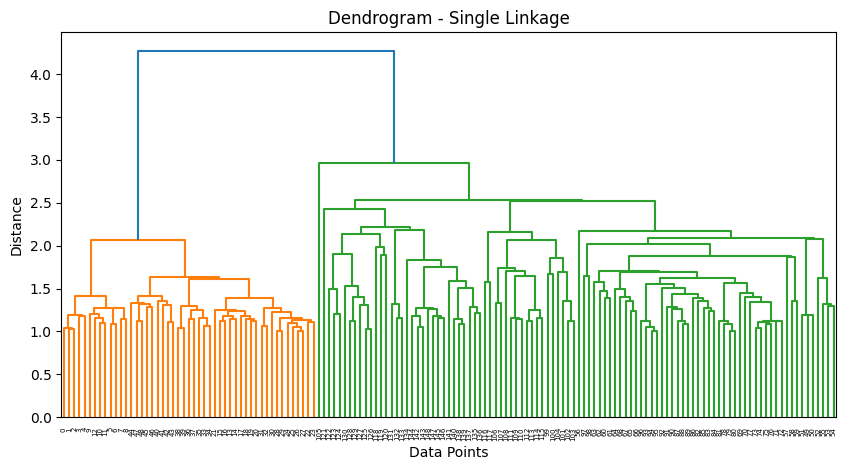

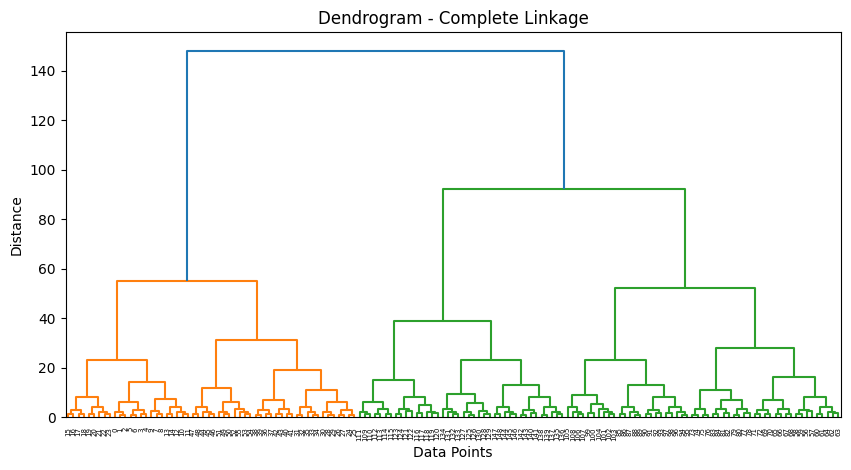

In [ ]:
# 9. Write a program to perform agglomerative clustering based on single-linkage, complete-linkage criteria.
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the iris dataset
iris = np.loadtxt('Iris.csv', delimiter=',', skiprows=1)

# Function to calculate the proximity matrix based on single-linkage
def single_linkage(data):
    n = data.shape[0]
    proximity_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i+1, n):
            proximity_matrix[i, j] = np.min(np.linalg.norm(data[i] - data[j]))
            proximity_matrix[j, i] = proximity_matrix[i, j]

    return proximity_matrix

# Function to calculate the proximity matrix based on complete-linkage
def complete_linkage(data):
    n = data.shape[0]
    proximity_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i+1, n):
            proximity_matrix[i, j] = np.max(np.linalg.norm(data[i] - data[j]))
            proximity_matrix[j, i] = proximity_matrix[i, j]

    return proximity_matrix

# Calculate the proximity matrix using single-linkage
single_linkage_matrix = single_linkage(iris)
print("Single-linkage proximity matrix:\n")
print(single_linkage_matrix)

# Calculate the proximity matrix using complete-linkage
complete_linkage_matrix = complete_linkage(iris)
print("\nComplete-linkage proximity matrix:\n")
print(complete_linkage_matrix)

# Plot the dendrogram using single-linkage
linkage_matrix = linkage(iris, method='single')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram - Single Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Plot the dendrogram using complete-linkage
linkage_matrix = linkage(iris, method='complete')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


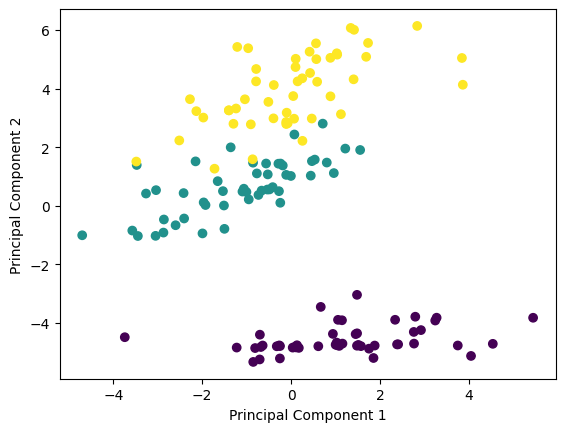

In [ ]:
# 11 a. Write a program to develop Principal Component Analysis (PCA) algorithm.
import numpy as np

class PCA:

    def __init__(self, n):
        self.n = n
        components = None
        self.mean = None

    def fit(self, X):
        # mean centering
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean

        # covariance, functions needs samples as columns
        cov = np.cov(X.T)

        # eigenvectors, eigenvalues
        eigenvectors, eigenvalues = np.linalg.eig(cov)

        # eigenvectors v = [:, i] column vector, transpose this for easier calculations
        eigenvectors = eigenvectors.T

        # sort eigenvectors
        idxs = np.argsort(eigenvalues)
        idxs=idxs[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n]

    def transform(self, X):
        # projects data
        X = X - self.mean
        return np.dot(X, self.components.T)



import matplotlib.pyplot as plt
from sklearn import datasets

# data = datasets.load_digits()
data = datasets.load_iris()
X = data.data
y = data.target

# Project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2, c=y, cmap="viridis")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
# plt.colorbar()
plt.show()

(150, 4)
(150, 2)


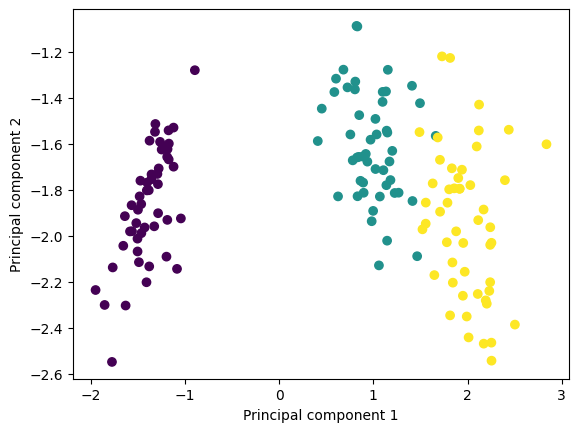

In [ ]:
# 11 b. Write a program to develop Linear Discriminant Analysis (LDA) algorithm.
import numpy as np
class LDA:

    def __init__(self, n):
        self.n = n
        self.ld = None

    def fit(self, X, y):
        features = X.shape[1]
        labels = np.unique(y)
        mean = np.mean(X, axis=0)
        SW = np.zeros((features, features))
        SB = np.zeros((features, features))
        for c in labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            SW += (X_c - mean_c).T.dot((X_c - mean_c))
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean).reshape(features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)


        A = np.linalg.inv(SW).dot(SB)
        eval, evec = np.linalg.eig(A)
        evec = evec.T
        idxs = np.argsort(abs(eval))[::-1]
        eval = eval[idxs]
        evec = evec[idxs]
        self.ld = evec[0:self.n]

    def transform(self, X):
        # project data
        return np.dot(X, self.ld.T)

import matplotlib.pyplot as plt
from sklearn import datasets
data=datasets.load_iris()
X=data.data
y=data.target
lda=LDA(2)
lda.fit(X,y)
X_projected = lda.transform(X)
print(X.shape)
print(X_projected.shape)
x1=X_projected[:,0]
x2=X_projected[:,1]
plt.scatter(x1,x2,c=y,cmap="viridis")
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
# plt.colorbar()
plt.show()